<a href="https://colab.research.google.com/github/wbandabarragan/quantum-mechanics-1/blob/main/python-tools/python_for_QM07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heisenberg uncertainty principle

We have the following wavefunction for a free particle:

$$\Psi(x,0) = A e^{-a |x|}$$

and we found that

$$\phi(k) = \sqrt{\frac{a}{2 \pi}} \frac{2a}{k^2 + a^2}$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from IPython import display
from PIL import Image # Pillow library -> PIL
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
# Define wavefunction and its fourier transform
def psi(a, x):
    return np.sqrt(a) * np.exp(-a * abs(x))
def phi(a, k):
    return 2*np.sqrt((a)/(2*np.pi))*((a)/(k**2 + a**2))

In [ ]:
# Create a folder
if os.path.isdir("./Figures"):
    print("Directory already exists.")
else:
    print("Directory has been created.")
    os.mkdir("./Figures")

Directory already exists.


In [ ]:
#a = np.arange(0,5, 0.2)
a = np.array([0.1,0.125, 0.15,0.175, 0.2,0.225, 0.25, 0.3,0.35, 0.5,0.6, 0.7, 1,2, 3,4, 5,6, 7])

In [ ]:
for i in range(0, len(a)):
    fig, ax = plt.subplots(figsize=(12, 12))

    # Set parameter a for width of the wavefunction

    # Set a vector range
    x = np.arange(-5,5, 0.01)

    psi_x = psi(a[i], x)
    phi_k = phi(a[i], x)

    # We create the meshgrid
    X, Y = np.meshgrid(x, x)

    PSI, PHI = np.meshgrid(psi_x, phi_k)
    Z3 = PSI*PHI

    # The map plot:
    ax.pcolormesh(X, Y, np.log10(Z3))#, vmin = -5, vmax = 0)
    ax.set_title("a = {:02}".format(a[i]), fontsize = 15, family = "serif")
    # Set aspect of themain Axes.
    ax.set_aspect(1.)

    # create new Axes on the right and on the top of the current Axes
    divider = make_axes_locatable(ax)
    # below height and pad are in inches
    ax_histx = divider.append_axes("top", 1.2, pad=0.8, sharex=ax)
    ax_histy = divider.append_axes("right", 1.2, pad=0.8, sharey=ax)

    # Wavefunction plot
    ax_histx.plot(x, psi_x)
    ax_histx.grid()
    ax_histx.set_xlabel(r"$x$", fontsize = 12)
    ax_histx.set_ylabel(r"$\Psi$", fontsize = 12)
    ax_histx.set_ylim(0,2)

    # Momentum function plot
    ax_histy.plot(phi_k, x, color = "red")
    ax_histy.grid()
    ax_histy.set_ylabel(r"$k$", fontsize = 12)
    ax_histy.set_xlabel(r"$\phi$", fontsize = 12)
    ax_histy.set_xlim(0,2)

    plt.savefig("./Figures/uncertainty_a_{:02}.jpg".format(i))
    plt.close()

In [ ]:
# Animation:

images_input = "./Figures/uncertainty_a_***.jpg"
imgif_output = "./Figures/uncertainty.gif"

# Collect the images
imgs = (Image.open(f) for f in sorted(glob.glob(images_input)))

img = next(imgs)

img.save(fp = imgif_output, format="GIF", append_images=imgs,\
        save_all=True, duration = 250, loop = 10)

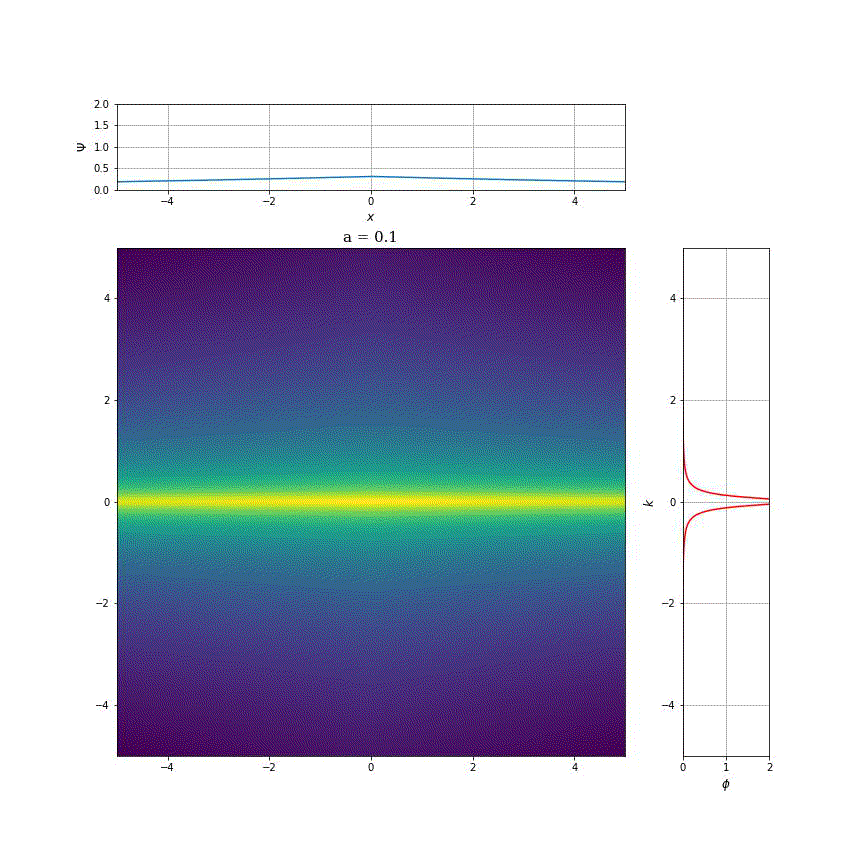

In [ ]:
display.Image(open('./Figures/uncertainty.gif','rb').read())